In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('house_price_min.csv')
data

,roomnum,area,price
0,1,10,0.8
1,1,15,1.0
2,2,20,1.8
3,2,30,2.0
4,3,50,3.2
5,3,60,3.0
6,4,70,3.5


In [3]:
data1 = data.dropna()#处理缺失值
data2 = pd.get_dummies(data1[['area','price']])#返回处理后数据
data2.price

0    0.8
1    1.0
2    1.8
3    2.0
4    3.2
5    3.0
6    3.5
Name: price, dtype: float64

In [4]:
# plt.scatter(data2.area,data2.price)
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.xlabel('面积')
# plt.ylabel('价格')

In [5]:
X = data2.iloc[:,:-1]
X

,area
0,10
1,15
2,20
3,30
4,50
5,60
6,70


In [6]:
y = data2.iloc[:,-1:]
y

,price
0,0.8
1,1.0
2,1.8
3,2.0
4,3.2
5,3.0
6,3.5


In [23]:
from sklearn.model_selection import train_test_split#切分测试数据和样本数据
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
y_test

,price
6,3.5
2,1.8
1,1.0


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)
model.score(X,y)

0.9304419523609793

In [34]:
model.predict([[15]])

array([[1.24368308]])

In [35]:
k = model.coef_[0][0]#0
k

0.04396145610278373

In [36]:
b = model.intercept_[0]#截距
b

0.5842612419700215

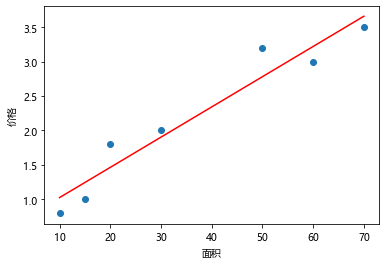

In [37]:
plt.scatter([data2.area],[data2.price])
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.xlabel('面积')
plt.ylabel('价格')
predict_result = k*X + b
plt.plot(X, predict_result,"r")